# Linear Algebra, Calculus, and Gradient Descent

__Objectives__
* Use operations with vectors and matrices to solve systems of linear equations
* Identify and describe of scalars, vectors,  matrices, using appropriate mathematical jargon
* Set up and solve systems of linear equations with real life examples
* Describe gradient descent in relation to slope, derivatives, and step size


## Why Linear Algebra?

Linear Algebra is the basis of many machine learning models.

Data is usually already set up into a matrix by default!

<img src= "./resources/dataset.jpeg">



It can be used to model complicated things like language

<img src = "./resources/Word-Vectors.png">

Important for image compression and recognition

<img src = "./resources/images.gif">

Also matrices are the common notation used in the popular libraries like numpy, scipy and sklearn.

<img src = "./resources/matrix_multiplication.png">


-- they are using w because it corresponds to the weight of the coeefficient 



This is an image from Andrew Ng's Neural Networks and Deep Learning course.

<img src = "./resources/gradient_descent.png" width  = 500>

This is an image from Andrew Ng's Sequence Model's Course. 

<img src = "./resources/lstm.png" width  = 500>

## Linear algebra and Linear Regression

- Let's move to the notebook matrix algebra with numpy :)

## Gradient Descent

[Gradient slide](https://www.youtube.com/watch?v=vWFjqgb-ylQ)



-- if you have 2 dimensional data, you need 3D to graph it. You will have 2 categories and your target. 


-- xnew = xold - (alpha(percentage size step to take aka learning rate) * the gradient) 

-- you are taking the inverse because the direction will follow the gradient, so you need to take the inverse of that in order to follow gradient descent


## Gradient in Action

In [8]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import seaborn as sns

In [9]:
numPoints=10
np.zeros(shape=numPoints)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [10]:
def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + np.random.uniform(0, 1) * variance
    return x, y

In [11]:
x = np.random.uniform(low =0, high=1, size = 1000)

y = 10*x + 25 + np.random.normal(loc = 0, scale = 1, size = 1000)

In [12]:
# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = genData(100, 25, 25)
m, n = np.shape(x)

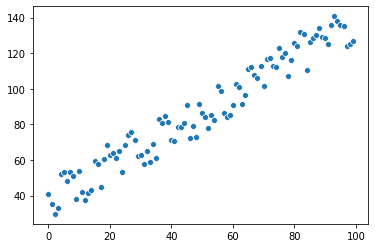

In [13]:
sns.scatterplot(x=x[:, 1], y=y)

plt.show()

In [14]:
x
theta = np.array([1.90595185,1.5342646])
np.dot(x, theta).shape

(100,)

__Your Turn__

Write a gradient descent function for this linear problem

- Inputs:
x, y, theta: initialized with some random values, alpha: learning rate, m: length of data, numiterations: number of iterations

- return: plot the errors for each iterations
- return the final theta values

In [15]:
# %load -r 1-20 supplement.py
def gradientDescent(x, y, theta, alpha, m, numIterations):
    xTrans = x.transpose()
    costs = []
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        if i % (numIterations // 40) == 0:
            print("Iteration %d | Cost: %f" % (i, cost))
            print(theta)
        costs.append(cost)
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    sns.scatterplot(y=costs, x=[i for i in range(len(costs))])

    return theta

Iteration 0 | Cost: 468.168526
[37.0595185  1.5342646]
Iteration 2500 | Cost: 27.638026
[37.04338766  1.01650233]
Iteration 5000 | Cost: 27.637782
[37.03557629  1.0166201 ]
Iteration 7500 | Cost: 27.637567
[37.02824499  1.01673063]
Iteration 10000 | Cost: 27.637377
[37.02136428  1.01683436]
Iteration 12500 | Cost: 27.637210
[37.01490644  1.01693173]
Iteration 15000 | Cost: 27.637063
[37.00884549  1.0170231 ]
Iteration 17500 | Cost: 27.636934
[37.00315704  1.01710887]
Iteration 20000 | Cost: 27.636820
[36.9978182   1.01718936]
Iteration 22500 | Cost: 27.636719
[36.99280748  1.0172649 ]
Iteration 25000 | Cost: 27.636631
[36.98810471  1.0173358 ]
Iteration 27500 | Cost: 27.636553
[36.98369096  1.01740235]
Iteration 30000 | Cost: 27.636484
[36.97954849  1.0174648 ]
Iteration 32500 | Cost: 27.636424
[36.9756606   1.01752342]
Iteration 35000 | Cost: 27.636370
[36.97201166  1.01757843]
Iteration 37500 | Cost: 27.636323
[36.96858697  1.01763006]
Iteration 40000 | Cost: 27.636282
[36.96537277  

array([36.9269993 ,  1.01825706])

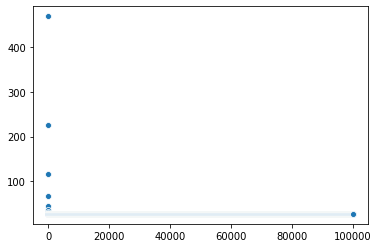

In [16]:
numIterations = 100000
alpha = 0.0001
theta = np.array([37.0595185,1.5342646])
a = gradientDescent(x, y, theta, alpha, m, numIterations)
a

Let's compare the results with the sklearn.

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lr = LinearRegression(fit_intercept= False)
lr.fit(x,y)
print(lr.coef_)


[36.9162885   1.01841854]
